In [1]:
from tensorflow.keras import layers, models
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split

import sys
sys.path.append("../")
from src.scalers import *
from src.metrics import *

## Keras CRNN

### Load data

In [2]:
dataset = pd.DataFrame(pd.read_csv('../input/digit-recognizer/train.csv'))
dataset = np.array(dataset, dtype='float64')
X, y = dataset[:, 1:], dataset[:, 0, np.newaxis]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [3]:
img_width, img_height = 28, 28

### Model

In [8]:
model = models.Sequential()

model.add(layers.Reshape(target_shape=(img_width, img_height, 1), name="Reshape1"))

# Convolutional layers
model.add(layers.Conv2D(
    32,
    (3, 3),
    activation="relu",
    kernel_initializer="he_normal",
    padding="same",
    name="Conv1",
))
model.add(layers.MaxPooling2D((2, 2), name="Pool1"))

model.add(layers.Conv2D(
    64,
    (3, 3),
    activation="relu",
    kernel_initializer="he_normal",
    padding="same",
    name="Conv2",
))
model.add(layers.MaxPooling2D((2, 2), name="Pool2"))


new_shape = ((img_width // 4), (img_height // 4) * 64)
model.add(layers.Reshape(target_shape=new_shape, name="Reshape2"))
model.add(layers.Dense(64, activation="relu", name="Dense1"))
model.add(layers.Dropout(0.2))

# Recurrent layers
model.add(layers.Bidirectional(layers.LSTM(128, return_sequences=True, dropout=0.25, name="LSTM1")))
model.add(layers.Bidirectional(layers.LSTM(64, return_sequences=True, dropout=0.25, name="LSTM2")))

# Output layer
model.add(layers.Flatten())
model.add(layers.Dense(10, activation="softmax", name="Dense2"))

# Compile the model and return
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
1182/1182 [==============================] - 44s 33ms/step - loss: 1.0385 - accuracy: 0.6423
Epoch 2/20
1182/1182 [==============================] - 40s 34ms/step - loss: 0.2551 - accuracy: 0.9173
Epoch 3/20
1182/1182 [==============================] - 40s 34ms/step - loss: 0.2159 - accuracy: 0.9304
Epoch 4/20
1182/1182 [==============================] - 40s 34ms/step - loss: 0.1972 - accuracy: 0.9355
Epoch 5/20
1182/1182 [==============================] - 43s 36ms/step - loss: 0.1624 - accuracy: 0.9456
Epoch 6/20
1182/1182 [==============================] - 40s 34ms/step - loss: 0.1745 - accuracy: 0.9443
Epoch 7/20
1182/1182 [==============================] - 39s 33ms/step - loss: 0.1560 - accuracy: 0.9487
Epoch 8/20
1182/1182 [==============================] - 40s 34ms/step - loss: 0.1400 - accuracy: 0.9529
Epoch 9/20
1182/1182 [==============================] - 40s 34ms/step - loss: 0.1633 - accuracy: 0.9456
Epoch 10/20
1182/1182 [==============================] - 41s 35m

In [10]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Reshape1 (Reshape)           (None, 28, 28, 1)         0         
_________________________________________________________________
Conv1 (Conv2D)               (None, 28, 28, 32)        320       
_________________________________________________________________
Pool1 (MaxPooling2D)         (None, 14, 14, 32)        0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 14, 14, 64)        18496     
_________________________________________________________________
Pool2 (MaxPooling2D)         (None, 7, 7, 64)          0         
_________________________________________________________________
Reshape2 (Reshape)           (None, 7, 448)            0         
_________________________________________________________________
Dense1 (Dense)               (None, 7, 64)            

In [11]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=-1)

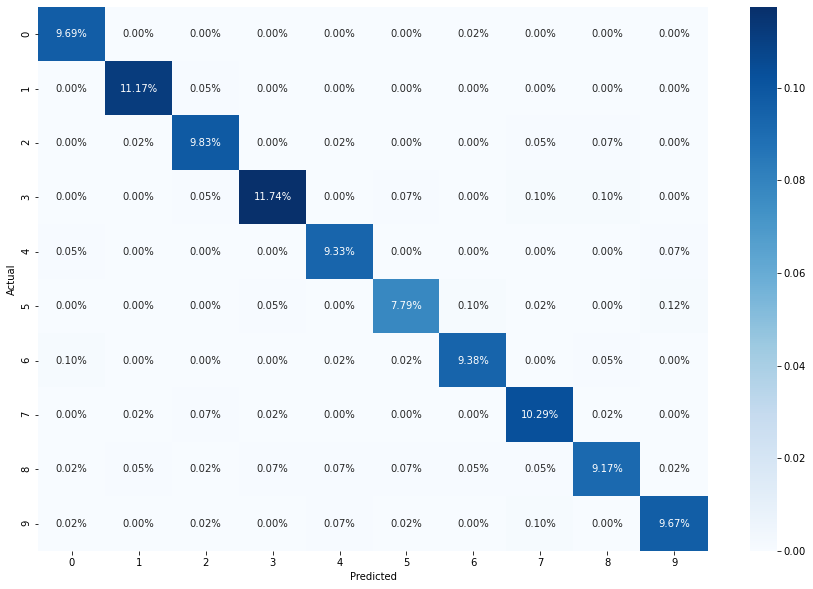

In [12]:
accuracy = plot_confusion_matrix(y_test, y_pred, fig_size=(15, 10))

In [13]:
print(f'Accuracy {accuracy}')

Accuracy 0.9804761904761905
